In [1]:
from arcgis.gis import GIS
from arcgis.features import FeatureLayerCollection, FeatureLayer

In [2]:
gis = GIS("https://python.playground.esri.com/portal","atma.mani","am4272017")

<Item title:"fortune_500_styled_wfl" type:Feature Layer Collection owner:atma.mani>
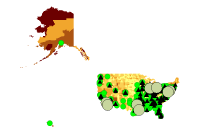

In [3]:
flc_item = gis.content.search('title:fortune_500_styled_wfl', 'Feature Layer')[0]
flc_item

In [4]:
flc= FeatureLayerCollection.fromitem(flc_item)
flc

<FeatureLayerCollection url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled/FeatureServer">

## turn back new york

In [5]:
fl0 = flc.layers[0]
fl0

<FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled/FeatureServer/0">

In [6]:
fset = fl0.query()
feats = fset.features

In [7]:
fset.df

,feature,name,objectid,pop,SHAPE
0,"Population greater than 999,999 County Seat",Los Angeles,1,3485398.0,"{'y': 4035820.211774349, 'x': -13162974.851296..."
1,"Population greater than 999,999 County Seat",San Diego,2,1110549.0,"{'y': 3857562.1830241606, 'x': -13041954.62036..."
2,"Population greater than 999,999 County Seat",Philadelphia,4,1585577.0,"{'y': 4859017.708513573, 'x': -8367174.402575912}"
3,"Population greater than 999,999 County Seat",Dallas,5,1006877.0,"{'y': 3866612.2823705524, 'x': -10775794.13167..."
4,"Population greater than 999,999 County Seat",Houston,6,1630553.0,"{'y': 3473191.15015807, 'x': -10615848.742394906}"
5,"Population greater than 999,999 County Seat",Chicago,7,2783726.0,"{'y': 5138534.111508258, 'x': -9757182.20522622}"
6,"Population greater than 999,999 County Seat",Detroit,8,1027974.0,"{'y': 5210795.566323765, 'x': -9244611.481048988}"
7,"Population greater than 999,999 County Seat",New York,3,7322564.0,"{'y': 4970310.197143376, 'x': -8238277.756585078}"


In [14]:
ny_feature = [f for f in feats if f.attributes['name']=='New York City'][0]
ny_feature.attributes

{'feature': 'Population greater than 999,999   County Seat',
 'name': 'New York City',
 'objectid': 3,
 'pop': 7322564.0}

In [15]:
import copy
ny_edit = copy.deepcopy(ny_feature)
ny_edit.attributes['name'] = 'New York'

In [16]:
update_result = fl0.edit_features(updates=[ny_edit])
update_result

{'addResults': [],
 'attachments': {'addResults': [], 'deleteResults': [], 'updateResults': []},
 'deleteResults': [],
 'updateResults': [{'globalId': None, 'objectId': 3, 'success': True}]}

## turn off edit capability

In [18]:
flc.manager.update_definition({'capabilities':'Query'})

{'success': True}

In [8]:
flc.properties.capabilities

'Query'